`#DS5G03_Maylinna Rahayu Ningsih_Assigment 4`

Dataset
Sales/Marketing (data preprocessing, feature encoding, advanced regression)
https://www.kaggle.com/competitions/home-data-for-ml-course/data   

Download dataset baru dari Assignment 3( Data Prep+Feature Enginering)

# LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Upload your kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

import os
import json

# Set Kaggle API credentials
kaggle_json = '/content/kaggle.json'
with open(kaggle_json, 'r') as file:
    kaggle_data = json.load(file)

os.environ['KAGGLE_USERNAME'] = kaggle_data['username']
os.environ['KAGGLE_KEY'] = kaggle_data['key']

In [ ]:
! kaggle competitions download -c home-data-for-ml-course

  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 99.9MB/s]


In [ ]:
!unzip /content/home-data-for-ml-course.zip

Archive:  /content/home-data-for-ml-course.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


## Load data latih

In [ ]:
train_data= pd.read_csv('/content/train.csv')

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Load data uji

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Define a problem statement based on the dataset that you have chosen. Explain why you think Machine Learning / Learning for Data application on the problem statement may be fruitful / the right approach

Problem Statement:

Mengingat dataset yang disediakan berisi informasi tentang penjualan properti beserta berbagai atribut terkait, permasalahan yang dapat didefinisikan adalah "Memprediksi Harga Penjualan Properti (SalePrice) berdasarkan atribut-atribut yang tersedia.seperti tipe bangunan (MSSubClass), klasifikasi zona (MSZoning), luas tanah (LotArea), kualitas bahan dan selesai (OverallQual), tahun konstruksi (YearBuilt), dan banyak atribut lainnya

Alasan:


*   Dataset ini memiliki banyak atribut yang beragam, seperti tipe properti, kualitas, tahun pembangunan, dan karakteristik lainnya. Model Machine Learning dapat membantu mengidentifikasi pola yang mungkin sulit ditemukan oleh analisis manual
*   Dengan menggunakan algoritma Machine Learning, kita dapat membangun model yang mampu memberikan prediksi harga penjualan properti yang lebih akurat berdasarkan data historis yang telah ada

*   penggunaan Machine Learning dalam permasalahan ini dapat memberikan manfaat dalam memprediksi harga penjualan properti secara lebih akurat dan efisien, yang dapat membantu dalam pengambilan keputusan di pasar properti






# Determine which models are relevant to the existing dataset according to the problem understanding that has been done before and are able to present the reasons for using modeling for the problem from the existing dataset

Regresi

Masalah regresi dengan memprediksi angka kontinu seperti harga penjualan properti (SalePrice)

tujuan utama adalah memprediksi nilai numerik (harga penjualan) berdasarkan atribut-atribut yang ada.

Oleh karena itu, pilihan model yang relevan adalah model regresi, seperti Linear Regression, Decision Trees, Random Forest, Gradient Boosting, Support Vector Regression, dan sejenisnya

Model yang dipili : Random Forest Regressor
* Reason for Use:
pilihan yang baik karena kemampuannya dalam menangani regresi dan dataset yang memiliki banyak atribut. Ini juga efektif dalam mengatasi overfitting dan dapat menghasilkan prediksi yang akurat

# Execute the modeling code appropriately in the right order

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Gabungkan data latih dan data uji untuk preprocessing bersama

In [ ]:
data = pd.concat([train_data, test_data], ignore_index=True)

## Data Preprocessing

### Cek & handling missing value

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


In [ ]:
# Cari kolom-kolom dengan missing value
missing_columns = data.columns[data.isnull().any()]

# Tampilkan hanya kolom-kolom dengan missing value beserta jumlah missing value
print(data[missing_columns].isnull().sum())

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [ ]:
# 1. LotFrontage
# LotFrontage: Linear feet of street connected to property

# How Resolve========> imputasi dengan nilai rata-rata atau median
# Imputasi dengan nilai median
median_lot_frontage = data['LotFrontage'].median()
data['LotFrontage'].fillna(median_lot_frontage, inplace=True)

# LotFrontage: Karena kolom ini berkaitan dengan panjang garis depan properti,
# Median digunakan karena ini adalah metode yang lebih tahan terhadap outlier daripada rata-rata (mean). Dengan mengisi dengan median, kita akan mempertahankan distribusi yang lebih stabil dari data ini

In [ ]:
# 2. Alley
# Alley: Type of alley access

# How Resolve========> menghapus alley
# Menghapus kolom 'Alley' dari dataset
data.drop(columns=['Alley'], inplace=True)

In [ ]:
# 3. MasVnrType
# 4. MasVnrArea

# How Resolve========> Imputasi dengan Modus


# Imputasi dengan modus untuk MasVnrType
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)

# # Imputasi dengan nilai 0 untuk MasVnrArea
data['MasVnrArea'].fillna(0, inplace=True)

#  Karena jumlah missing value sangat sedikit, digunakan imputasi dengan modeus (nilai paling sering muncul)
# untuk MasVnrType dan nilai 0 untuk MasVnrArea

In [ ]:
# 5. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# How Resolve========> Menggunakan nilai default "NoBsmt"

basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data[basement_cols] = data[basement_cols].fillna('NoBsmt')

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, dan BsmtFinType2: berkaitan dengan kondisi dan tipe basement.
# digunakan "NoBsmt" sebagai nilai default untuk semua kolom ini, karena missing value mungkin menunjukkan bahwa properti tersebut tidak memiliki basement

In [ ]:
# 6. Electrical
# How Resolve========> Imputasi dengan Modus

# Imputasi dengan modus untuk Electrical
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

# karena hanya ada satu data yang hilang, maka digantikan nilai yang hilang dengan modus (nilai paling sering muncul) dari kolom Electrical.

In [ ]:
# 7. FireplaceQu
# How Resolve========> Menggunakan Nilai Default

# Menggunakan nilai default "NoFireplace"
data['FireplaceQu'].fillna('NoFireplace', inplace=True)

# FireplaceQu: Kolom ini berkaitan dengan kualitas perapian.
# digantikan nilai yang hilang dengan "NoFireplace" sebagai nilai default.

In [ ]:
# 8. GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
# How Resolve========> Menggunakan Nilai Default

# Menggunakan nilai default "NoGarage"
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
data[garage_cols] = data[garage_cols].fillna('NoGarage')

# GarageType, GarageYrBlt, GarageFinish, GarageQual, dan GarageCond: Berkaitan dengan garasi.
# digunakan "NoGarage" sebagai nilai default untuk semua kolom ini.

In [ ]:
# 9. PoolQC
# How Resolve========> Menggunakan Nilai Default

# Menggunakan nilai default "NoPool"
data['PoolQC'].fillna('NoPool', inplace=True)

# PoolQC: Kolom ini berkaitan dengan kualitas kolam renang.
# digunakan "NoPool" sebagai nilai default.

In [ ]:
# 10. Fence
# How Resolve========> Menggunakan Nilai Default
data['Fence'].fillna('NoFence', inplace=True)

# Fence: Berkaitan dengan kualitas pagar.
# digunakan "NoFence" sebagai nilai default.

In [ ]:
# 11. MiscFeature
# How Resolve========> Menggunakan Nilai Default
data['MiscFeature'].fillna('NoMiscFeature', inplace=True)

# MiscFeature: Berkaitan dengan fitur tambahan.
# digunakan "NoMiscFeature" sebagai nilai default.

## Feature Encoding

In [ ]:
data = pd.get_dummies(data)

## Pisahkan kembali data latih dan data uji setelah preprocessing

In [ ]:
train_data = data[:len(train_data)]
test_data = data[len(train_data):]

## Pisahkan fitur dan target variable

In [ ]:
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

## Bagi data latih menjadi data latih dan data validasi  8:2

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Inisialisasi model Linear Regression

In [ ]:
# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

## Latih model pada data latih

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Melakukan prediksi pada data validasi

In [ ]:
y_pred = model.predict(X_valid)

## Evaluasi performa model

In [ ]:
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

In [ ]:
# Menampilkan hasil evaluasi
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  851916548.3087497
R-squared (R2) Score:  0.888933465761795


# Generate feature importances from models that have been created previously. The results of the features importances produced are expected to be changed in the form of visualization


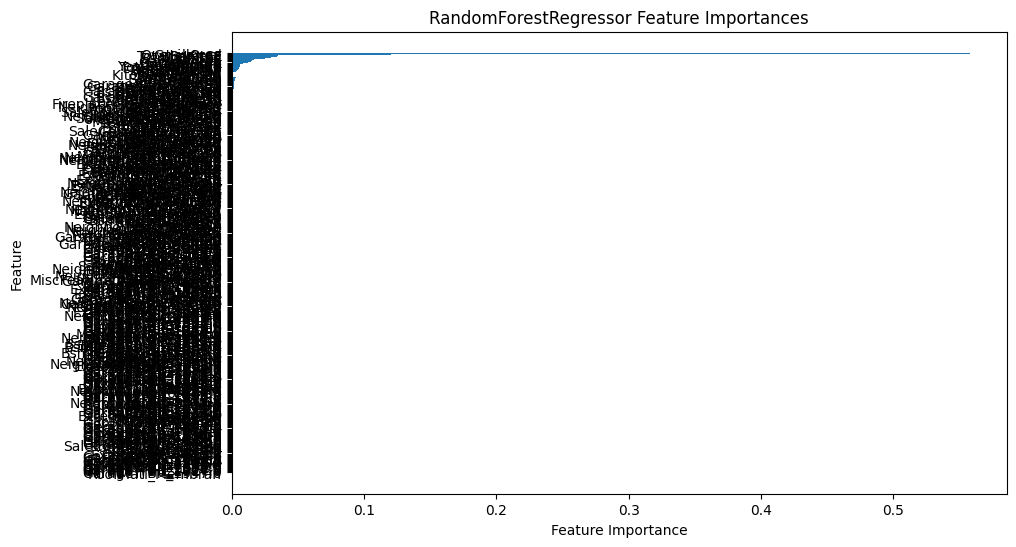

In [ ]:
feature_importances = model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegressor Feature Importances')
plt.show()

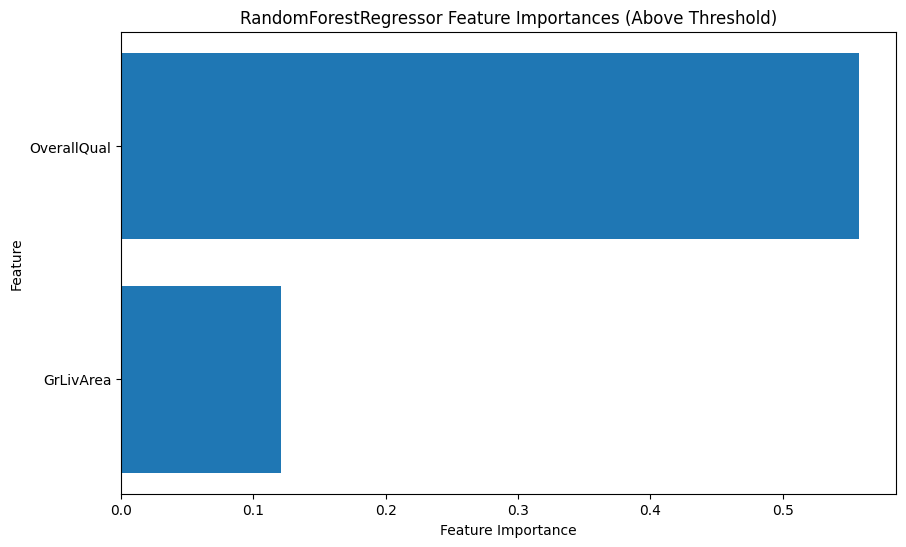

In [ ]:

# Ambang (threshold) untuk feature importance yang akan ditampilkan
threshold = 0.1  # Gantilah dengan ambang yang sesuai

# Mengambil feature importance
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Mengambil indeks dari feature importance yang melewati ambang
selected_indices = np.where(feature_importances > threshold)[0]

# Mengambil feature importance dan nama fitur yang melewati ambang
selected_feature_importances = feature_importances[selected_indices]
selected_feature_names = np.array(feature_names)[selected_indices]

# Mengurutkan fitur berdasarkan feature importance
sorted_indices = np.argsort(selected_feature_importances)

# Membuat plot untuk fitur yang melewati ambang tertentu
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), selected_feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), selected_feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegressor Feature Importances (Above Threshold)')
plt.show()


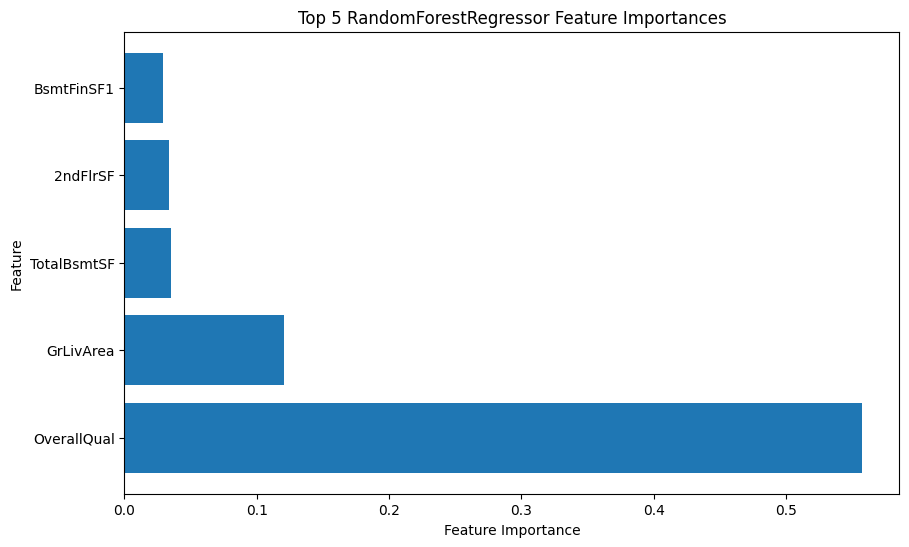

In [ ]:
import matplotlib.pyplot as plt

# Mengambil feature importance
feature_importances = model.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]  # Mengurutkan dari tinggi ke rendah

# Menentukan jumlah fitur teratas yang ingin ditampilkan
top_n = 5  # Ganti sesuai kebutuhan Anda

# Mengambil hanya top_n fitur dengan feature importance tertinggi
top_feature_importances = feature_importances[sorted_indices[:top_n]]
top_feature_names = np.array(feature_names)[sorted_indices[:top_n]]

# Membuat plot hanya untuk fitur-fitur teratas
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances)
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} RandomForestRegressor Feature Importances')
plt.show()


# Explain the results of the visualization of feature importances that have been previously generated

Dari visualisasi feature importances yang telah dihasilkan, kita dapat menarik beberapa kesimpulan penting:

1. OverallQual memiliki feature importance yang paling tinggi, yang berarti fitur ini memiliki kontribusi yang paling signifikan dalam memprediksi nilai SalePrice. Dengan kata lain, kualitas keseluruhan properti adalah fitur yang paling kuat memengaruhi harga penjualan properti. Ini hal yang wajar karena biasanya kualitas properti sangat memengaruhi harga jualnya.

2. GrLivArea adalah fitur berikutnya dengan feature importance yang tinggi. Ini berarti luas lantai atas (Ground Living Area) juga memiliki kontribusi yang signifikan dalam memprediksi SalePrice. Dalam banyak kasus, ukuran rumah adalah faktor penting dalam menentukan harga jualnya